<a href="https://colab.research.google.com/github/lucianogaldino/ENEM-2019-SP/blob/main/Enem_2019_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO ENEM 2019**

## Este projeto analisa os resultados do ENEM no estado de São Paulo no ano de 2019.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## Os dados foram extraídos do site do INEP:

http://inep.gov.br/microdados

In [2]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Indicadores Educacionais/ENEM_SP_2019.csv', sep=',', encoding='iso-8859-1')

## **ORGANIZAÇÃO DOS DADOS**

In [3]:
dados.head()

,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NOTA_CN,NU_NOTA_CH,NOTA_CH,NU_NOTA_LC,NOTA_LC,NU_NOTA_MT,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,1.900010e+11,2019,Santa Isabel,SP,22,M,3,1,1,0,NaN,1,1,1,1,5646.0,564.6,5858.0,585.8,5929.0,592.9,6002.0,600.2,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0
1,1.900010e+11,2019,Pinhalzinho,SP,19,M,3,1,1,0,NaN,0,0,0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.900010e+11,2019,São Paulo,SP,17,F,3,1,3,0,15567761.0,1,1,1,1,5762.0,576.2,6411.0,641.1,6343.0,634.3,7318.0,731.8,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0
3,1.900010e+11,2019,São Bernardo do Campo,SP,19,M,3,1,2,0,35904958.0,1,1,1,1,4022.0,402.2,4248.0,424.8,5096.0,509.6,3932.0,393.2,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0
4,1.900010e+11,2019,São Joaquim da Barra,SP,37,M,1,1,1,0,NaN,0,0,0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#O número total de inscritos em São Paulo foi de 813772, sendo de 15,97% de todo o Brasil que foi de 5095308 inscritos. 
dados.shape

(813772, 31)

In [6]:
# Análise dos tipos de atributos.
dados.dtypes


NU_INSCRICAO               float64
NU_ANO                       int64
NO_MUNICIPIO_RESIDENCIA     object
SG_UF_RESIDENCIA            object
NU_IDADE                     int64
TP_SEXO                     object
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
TP_ESCOLA                    int64
IN_TREINEIRO                 int64
CO_ESCOLA                  float64
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NU_NOTA_CN                 float64
NOTA_CN                    float64
NU_NOTA_CH                 float64
NOTA_CH                    float64
NU_NOTA_LC                 float64
NOTA_LC                    float64
NU_NOTA_MT                 float64
NOTA_MT                    float64
TP_LINGUA                    int64
TP_STATUS_REDACAO          float64
NU_NOTA_COMP1              float64
NU_NOTA_COMP2              float64
NU_NOTA_COMP3              float64
NU_NOTA_COMP4       

In [9]:
dados['NU_IDADE'].value_counts()

17    219313
18    147548
19     81236
16     59316
20     53009
       ...  
4          1
3          1
91         1
86         1
2          1
Name: NU_IDADE, Length: 80, dtype: int64

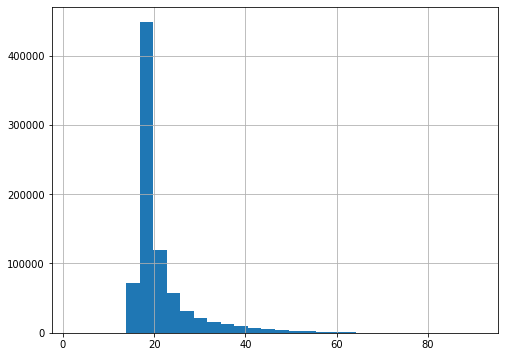

In [10]:
dados['NU_IDADE'].hist(bins=30, figsize=(8,6));

In [11]:
dados['NU_IDADE'].value_counts().sort_index()

2     1
3     1
4     1
5     2
6     2
     ..
80    2
81    3
82    2
86    1
91    1
Name: NU_IDADE, Length: 80, dtype: int64

Alguns valores estranhos e curiosos: pessoas menores que 10 anos e maiores de 80 anos.

In [12]:
menores_12 = dados.query('NU_IDADE <= 12')['NO_MUNICIPIO_RESIDENCIA'].value_counts()

In [13]:
# Crianças abaixo de 11 anos, algumas abaixo de 6 anos aparecem como inscritas. Esse dados serão excluídos devido a alta probabilidade de erros.
menores_12

São Paulo                 5
Araçatuba                 2
Embu das Artes            1
Assis                     1
Santana de Parnaíba       1
Ribeirão Preto            1
São Bernardo do Campo     1
Queiroz                   1
Angatuba                  1
Marília                   1
Sertãozinho               1
Auriflama                 1
Vargem Grande Paulista    1
Campinas                  1
Andradina                 1
Tambaú                    1
Bálsamo                   1
Name: NO_MUNICIPIO_RESIDENCIA, dtype: int64

In [15]:
dados_maiores_11 = dados.loc[dados.NU_IDADE > 11]

In [16]:
dados_maiores_11.head()

,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NOTA_CN,NU_NOTA_CH,NOTA_CH,NU_NOTA_LC,NOTA_LC,NU_NOTA_MT,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,1.900010e+11,2019,Santa Isabel,SP,22,M,3,1,1,0,NaN,1,1,1,1,5646.0,564.6,5858.0,585.8,5929.0,592.9,6002.0,600.2,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0
1,1.900010e+11,2019,Pinhalzinho,SP,19,M,3,1,1,0,NaN,0,0,0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.900010e+11,2019,São Paulo,SP,17,F,3,1,3,0,15567761.0,1,1,1,1,5762.0,576.2,6411.0,641.1,6343.0,634.3,7318.0,731.8,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0
3,1.900010e+11,2019,São Bernardo do Campo,SP,19,M,3,1,2,0,35904958.0,1,1,1,1,4022.0,402.2,4248.0,424.8,5096.0,509.6,3932.0,393.2,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0
4,1.900010e+11,2019,São Joaquim da Barra,SP,37,M,1,1,1,0,NaN,0,0,0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dados_maiores_11['NU_IDADE'].value_counts().sort_index()

12        6
13       29
14      355
15    11583
16    59316
      ...  
80        2
81        3
82        2
86        1
91        1
Name: NU_IDADE, Length: 73, dtype: int64

In [18]:
# Quantidade de Treineiros
dados_maiores_11.query('IN_TREINEIRO == 1')['IN_TREINEIRO'].value_counts()

1    93988
Name: IN_TREINEIRO, dtype: int64

In [19]:
treineiros = dados_maiores_11.loc[dados_maiores_11.IN_TREINEIRO == 1]

In [20]:
treineiros.head()

,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NOTA_CN,NU_NOTA_CH,NOTA_CH,NU_NOTA_LC,NOTA_LC,NU_NOTA_MT,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
20,1.900010e+11,2019,Santos,SP,15,F,3,1,1,1,NaN,1,1,1,1,4554.0,455.4,5067.0,506.7,4804.0,480.4,5732.0,573.2,0,1.0,140.0,120.0,120.0,100.0,80.0,560.0
21,1.900010e+11,2019,Panorama,SP,16,F,3,1,1,1,NaN,0,0,0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,1.900010e+11,2019,São Paulo,SP,16,F,1,1,1,1,NaN,1,1,1,1,4245.0,424.5,5177.0,517.7,4896.0,489.6,5326.0,532.6,0,1.0,120.0,120.0,120.0,100.0,80.0,540.0
109,1.900010e+11,2019,Águas de Lindóia,SP,16,M,1,1,1,1,NaN,0,0,0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,1.900010e+11,2019,Águas de Lindóia,SP,15,M,1,1,1,1,NaN,0,0,0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Separação entre os treineiros e os vestibulandos
vestibulandos = dados_maiores_11.loc[dados_maiores_11.IN_TREINEIRO == 0]

In [22]:
vestibulandos.head()

,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NOTA_CN,NU_NOTA_CH,NOTA_CH,NU_NOTA_LC,NOTA_LC,NU_NOTA_MT,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,1.900010e+11,2019,Santa Isabel,SP,22,M,3,1,1,0,NaN,1,1,1,1,5646.0,564.6,5858.0,585.8,5929.0,592.9,6002.0,600.2,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0
1,1.900010e+11,2019,Pinhalzinho,SP,19,M,3,1,1,0,NaN,0,0,0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.900010e+11,2019,São Paulo,SP,17,F,3,1,3,0,15567761.0,1,1,1,1,5762.0,576.2,6411.0,641.1,6343.0,634.3,7318.0,731.8,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0
3,1.900010e+11,2019,São Bernardo do Campo,SP,19,M,3,1,2,0,35904958.0,1,1,1,1,4022.0,402.2,4248.0,424.8,5096.0,509.6,3932.0,393.2,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0
4,1.900010e+11,2019,São Joaquim da Barra,SP,37,M,1,1,1,0,NaN,0,0,0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
vestibulandos.shape

(719768, 31)

In [52]:
# Análise da quantidade de presentes, faltantes e eliminados nas provas.
presenca = vestibulandos.loc[vestibulandos.TP_PRESENCA_MT == 2]

In [53]:
presenca.shape

(270, 31)

RESUMO DA PRESENÇA NAS PROVAS:

Ciências da Natureza: 500805 presentes, 218693 faltaram e 270 eliminados.

Ciências Humanas: 533142 presentes, 185969 faltaram e 657 eliminados.

Linguagens e Códigos: 533142 presentes, 185969 faltaram e 657 eliminados.

Matemática: 500805 presentes, 218693 faltaram e 270 eliminados.

In [54]:
provas = ['NU_NOTA_REDACAO','NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_CH']

In [55]:
dados[provas].isnull().sum()

NU_NOTA_REDACAO    193127
NU_NOTA_CN         231167
NU_NOTA_MT         231167
NU_NOTA_LC         193127
NU_NOTA_CH         193127
dtype: int64

In [67]:
presenca_total = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_MT','TP_PRESENCA_LC']

In [74]:
#Criado uma coluna que soma as presenças nas provas, se soma for 0 faltou nos dois dias, se soma for 2 foi em um dia e se soma for 4, foi nos dois dias.
vestibulandos['presenca_total'] = vestibulandos[presenca_total].sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
vestibulandos.head()

,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NOTA_CN,NU_NOTA_CH,NOTA_CH,NU_NOTA_LC,NOTA_LC,NU_NOTA_MT,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,presenca_total
0,1.900010e+11,2019,Santa Isabel,SP,22,M,3,1,1,0,NaN,1,1,1,1,5646.0,564.6,5858.0,585.8,5929.0,592.9,6002.0,600.2,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,4
1,1.900010e+11,2019,Pinhalzinho,SP,19,M,3,1,1,0,NaN,0,0,0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1.900010e+11,2019,São Paulo,SP,17,F,3,1,3,0,15567761.0,1,1,1,1,5762.0,576.2,6411.0,641.1,6343.0,634.3,7318.0,731.8,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,4
3,1.900010e+11,2019,São Bernardo do Campo,SP,19,M,3,1,2,0,35904958.0,1,1,1,1,4022.0,402.2,4248.0,424.8,5096.0,509.6,3932.0,393.2,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,4
4,1.900010e+11,2019,São Joaquim da Barra,SP,37,M,1,1,1,0,NaN,0,0,0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [91]:
# Siglas: 0 faltou nos dois dias, 2 faltou em um dia e 4 compareceu nos dois dias.
verificacao_presenca = vestibulandos.loc[vestibulandos.presenca_total == 4]

In [92]:
verificacao_presenca.shape

(500526, 32)

COMPARECIMENTO NOS DIAS DAS PROVAS:

500526 inscritos compareceram nos dois dias.

185175 inscritos faltaram nos dois dias.

33726 inscritos faltaram em um dos dias.



In [93]:
#Desconsiderando todos que faltaram nos dois dias, pois estão sem notas.
vestibulandos_presentes = vestibulandos.loc[vestibulandos.presenca_total != 0]

In [94]:
vestibulandos_presentes[provas].isnull().sum()

NU_NOTA_REDACAO     1451
NU_NOTA_CN         33788
NU_NOTA_MT         33788
NU_NOTA_LC          1451
NU_NOTA_CH          1451
dtype: int64

In [99]:
# Substituindo NAN por 0 nas notas de redação
vestibulandos_presentes['NU_NOTA_REDACAO'].fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [100]:
vestibulandos_presentes['NU_NOTA_COMP1'].fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [101]:
vestibulandos_presentes['NU_NOTA_COMP2'].fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [102]:
vestibulandos_presentes['NU_NOTA_COMP3'].fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [103]:
vestibulandos_presentes['NU_NOTA_COMP4'].fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [104]:
vestibulandos_presentes['NU_NOTA_COMP5'].fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [96]:
vestibulandos_presentes.head()

,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NOTA_CN,NU_NOTA_CH,NOTA_CH,NU_NOTA_LC,NOTA_LC,NU_NOTA_MT,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,presenca_total
0,1.900010e+11,2019,Santa Isabel,SP,22,M,3,1,1,0,NaN,1,1,1,1,5646.0,564.6,5858.0,585.8,5929.0,592.9,6002.0,600.2,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,4
2,1.900010e+11,2019,São Paulo,SP,17,F,3,1,3,0,15567761.0,1,1,1,1,5762.0,576.2,6411.0,641.1,6343.0,634.3,7318.0,731.8,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,4
3,1.900010e+11,2019,São Bernardo do Campo,SP,19,M,3,1,2,0,35904958.0,1,1,1,1,4022.0,402.2,4248.0,424.8,5096.0,509.6,3932.0,393.2,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,4
5,1.900010e+11,2019,Embu-Guaçu,SP,17,F,3,1,2,0,NaN,1,1,1,1,3996.0,399.6,4268.0,426.8,4872.0,487.2,4192.0,419.2,0,1.0,120.0,120.0,120.0,120.0,80.0,560.0,4
8,1.900010e+11,2019,Guarulhos,SP,23,F,1,1,1,0,NaN,1,1,1,1,6257.0,625.7,6465.0,646.5,6293.0,629.3,7961.0,796.1,0,1.0,160.0,200.0,180.0,180.0,160.0,880.0,4


In [97]:
vestibulandos_presentes[provas].isnull().sum()

NU_NOTA_REDACAO        0
NU_NOTA_CN         33788
NU_NOTA_MT         33788
NU_NOTA_LC          1451
NU_NOTA_CH          1451
dtype: int64

In [105]:
notas_redacao = ['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']

In [107]:
vestibulandos_presentes[notas_redacao].head()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,160.0,200.0,180.0,200.0,200.0,940.0
2,160.0,120.0,200.0,200.0,200.0,880.0
3,80.0,160.0,120.0,100.0,100.0,560.0
5,120.0,120.0,120.0,120.0,80.0,560.0
8,160.0,200.0,180.0,180.0,160.0,880.0


In [108]:
vestibulandos_presentes[notas_redacao].isnull().sum()

NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64

In [109]:
notas_componentes = ['NU_NOTA_REDACAO','NOTA_CN','NOTA_MT','NOTA_LC','NOTA_CH']

In [110]:
vestibulandos_presentes[notas_componentes].isnull().sum()

NU_NOTA_REDACAO    0
NOTA_CN            0
NOTA_MT            0
NOTA_LC            0
NOTA_CH            0
dtype: int64

## **ANÁLISE DOS DADOS**

In [7]:
# relação entre homens e mulheres inscritos.
dados['TP_SEXO'].value_counts()

F    480164
M    333608
Name: TP_SEXO, dtype: int64

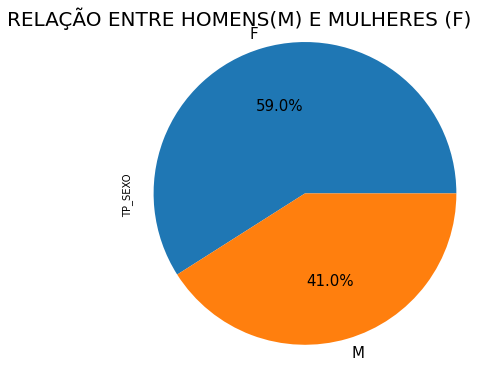

In [8]:
dados.TP_SEXO.value_counts().plot(figsize=(6,6),kind='pie', autopct='%.1f%%', fontsize=15)
plt.axis('equal')
plt.title('RELAÇÃO ENTRE HOMENS(M) E MULHERES (F)', loc = 'right', fontsize=20);